In [1]:
import pandas as pd
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [2]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
weather_df.dropna(inplace=True)

In [5]:
weather_df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [6]:
weather_df['Loud Cover'].unique()

array([0.])

In [7]:
weather_df.drop(['Loud Cover'],axis=1,inplace=True)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [26]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [27]:
X=weather_df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]
y=weather_df['Temperature (C)']

In [28]:
lrm = linear_model.LinearRegression()
lrm.fit(X,y)

LinearRegression()

In [29]:
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.25163712e+01 -2.02187858e-01  4.06766507e-03 -6.83734626e-04]

Intercept: 
 37.943087954320916


In [30]:
import statsmodels.api as sm
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.741e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:33:19   Log-Likelihood:            -3.2664e+05
No. Observations:               95936   AIC:                         6.533e+05
Df Residuals:                   95931   BIC:                         6.533e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9431      0.234    162.395      0.000      37.485      38.401
Humidity                 -32.5164      0.123   -263.572      0.000     -32.758     -32.275
Wind Speed (km/h)         -0.2022      0.004    -57.567      0.000      -0.209      -0.195
Wind Bearing (degrees)     0.0041      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.405      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3365.975   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3778.875
Skew:                          -0.457   Prob(JB):                         0.00
Kurtosis:                       3.332   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Using this OLS, we can estimate our model as:

temperature = 37.9430 + (-32.51) humidity + (-0.2022)wind speed + (0.0041)wind bearing + (-0.0007)pressure

Now the conditions:

In [33]:
lrm_example = linear_model.LinearRegression()
lrm_example.fit(X,y)

LinearRegression()

In [34]:
predictions = lrm_example.predict(X)

In [35]:
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)


Coefficients: 
 [ 0.00000000e+00 -3.25163712e+01 -2.02187858e-01  4.06766507e-03
 -6.83734626e-04]

Intercept: 
 37.943087954320056


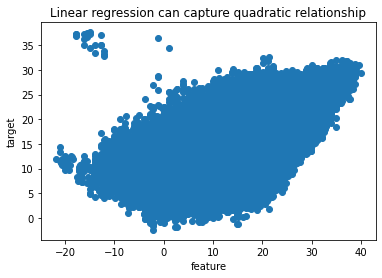

In [38]:
plt.scatter(y,predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linear regression can capture quadratic relationship')
plt.show()

We can see from the graph that the first condition is not satisfied.

In [40]:
predictions = lrm_example.predict(X)
errors = y - predictions
print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 9.232589490939681e-15


Second assumption is satisfied since the average of the model's error is almost zero.

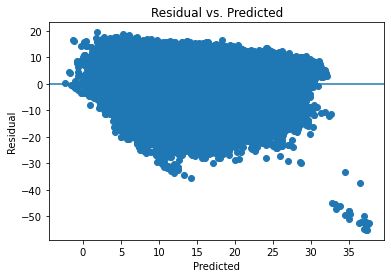

In [41]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [42]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2452.91 and p value is 0
Levene test statistic value is 2315.19 and p value is 0


Since both of the p-values are lower than 0.05, the test results reject the null hypothesis which means our errors are heteroscedastic.

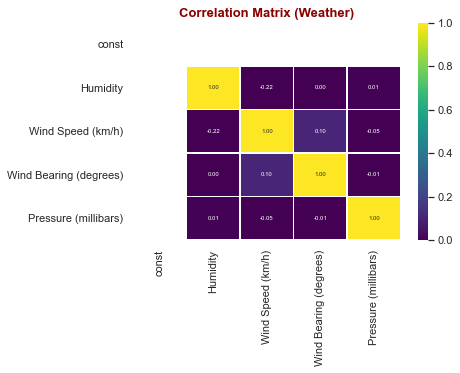

In [45]:
import seaborn as sns
sns.set(style="whitegrid")
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

sns.heatmap(X.corr(), annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (Weather)", fontdict=title_font)

plt.show()

Assumption 4 is satisfied.

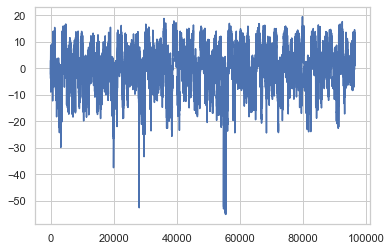

In [46]:
plt.plot(errors)
plt.show()

It seems that the error terms of our model are uncorrelated with each other.

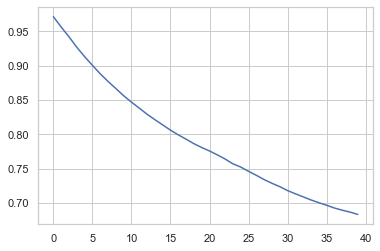

In [47]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

In [49]:
print(acf_data.min())
print(acf_data.max())

0.6834880185124257
1.0


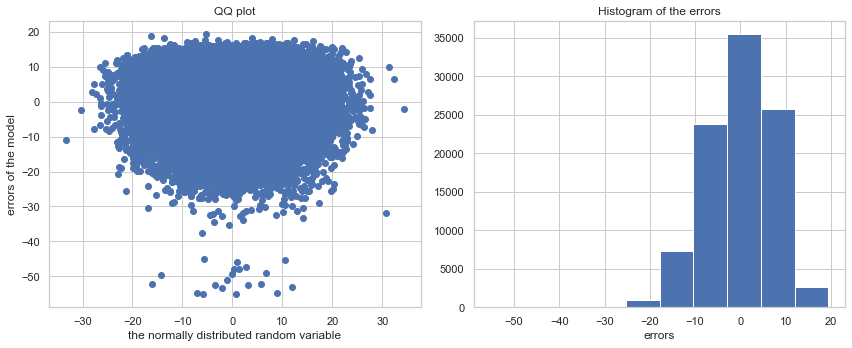

In [50]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

As can be seen in the charts above, our errors are not normally distributed. If they were, we would see a straight line going from the bottom-left to the upper-right of the QQ plot and a regular bell curve like shape in the histogram.

In [51]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [52]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3778.8752384064173 and p value is 0.0
Normality test statistics is 3365.974877325794 and p value is 0.0


The p-values of both tests indicate that our errors are not normally distributed.